In [1]:
from google.colab import files
uploaded = files.upload()

Saving 100000 Sales Records.xlsx to 100000 Sales Records (1).xlsx


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('100000 Sales Records.xlsx')
df.head()

# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

# 3.1.1. Missing Data Statistics and Treatment
# 3.1.1.1.1. Missing Data Statistics: Records
missing_records = df.isnull().sum(axis=1)
print("\nMissing Data Statistics: Records")
print(missing_records.value_counts())

# 3.1.1.1.2. Missing Data Treatment: Records
# Removing records with more than 50% missing data
threshold = 0.5
df = df[missing_records <= threshold]

# 3.1.1.2.1. Missing Data Statistics: Categorical Variables or Features
# 3.1.1.2.2. Missing Data Treatment: Categorical Variables or Features
categorical_vars = df.select_dtypes(include=['object']).columns
missing_categorical = df[categorical_vars].isnull().sum()
print("\nMissing Data Statistics: Categorical Variables")
print(missing_categorical)

# Imputation of missing data using the mode for categorical variables
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_vars] = imputer_categorical.fit_transform(df[categorical_vars])

# 3.1.1.3.1. Missing Data Statistics: Non-Categorical Variables or Features
# 3.1.1.3.2. Missing Data Treatment: Non-Categorical Variables or Features
numerical_vars = df.select_dtypes(include=['number']).columns
missing_numerical = df[numerical_vars].isnull().sum()
print("\nMissing Data Statistics: Non-Categorical Variables")
print(missing_numerical)

# Imputation of missing data using the mean for numerical variables
imputer_numerical = SimpleImputer(strategy='mean')
df[numerical_vars] = imputer_numerical.fit_transform(df[numerical_vars])

# 3.1.2. Numerical Encoding of Categorical Variables or Features
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# 3.1.3. Outlier Statistics and Treatment
# 3.1.3.1.1. Outlier Statistics: Non-Categorical Variables or Features
# 3.1.3.1.2. Outlier Treatment: Non-Categorical Variables or Features
for num_var in numerical_vars:
    # Calculate Z-scores
    z_scores = (df[num_var] - df[num_var].mean()) / df[num_var].std()
    # Identify outliers using a threshold (e.g., 3)
    outliers = np.abs(z_scores) > 3
    # Replace outliers with the median
    df.loc[outliers, num_var] = df[num_var].median()

# 3.1.3.1.2.1. Standardization: OV1, OV2, …
scaler_standard = StandardScaler()
df[numerical_vars] = scaler_standard.fit_transform(df[numerical_vars])

# 3.1.3.1.2.2. Normalization using Min-Max Scaler: OV3, OV4, …
scaler_minmax = MinMaxScaler()
df[numerical_vars] = scaler_minmax.fit_transform(df[numerical_vars])

# 3.1.3.1.2.3. Log Transformation: OV5, OV6, …
df[numerical_vars] = np.log1p(df[numerical_vars])

# 3.1.4. Data Bifurcation: Training & Testing Sets
# Assuming 'Total Profit' is the target variable
X = df.drop('Total Profit', axis=1)
y = df['Total Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed DataFrame
print("\nProcessed DataFrame:")
print(df.head())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   Order Date      100000 non-null  datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  datetime64[ns]
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtype

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel('100000 Sales Records.xlsx')

# Report how many variables are alphanumeric
alphanumeric_vars = df.select_dtypes(include=['object']).columns
num_alphanumeric_vars = len(alphanumeric_vars)
print(f"Number of alphanumeric variables: {num_alphanumeric_vars}")

# Assign numerical codes to alphanumeric variables
label_encoder = LabelEncoder()
for var in alphanumeric_vars:
    df[var + '_Encoded'] = label_encoder.fit_transform(df[var])

# Display the encoded dataframe
print("\nEncoded DataFrame:")
print(df)


Number of alphanumeric variables: 5

Encoded DataFrame:
                                  Region                Country  \
0           Middle East and North Africa             Azerbaijan   
1      Central America and the Caribbean                 Panama   
2                     Sub-Saharan Africa  Sao Tome and Principe   
3                     Sub-Saharan Africa  Sao Tome and Principe   
4      Central America and the Caribbean                 Belize   
...                                  ...                    ...   
99995                 Sub-Saharan Africa                  Niger   
99996                             Europe                 Poland   
99997                 Sub-Saharan Africa                Comoros   
99998       Middle East and North Africa                 Kuwait   
99999                 Sub-Saharan Africa               Tanzania   

           Item Type Sales Channel Order Priority Order Date   Order ID  \
0             Snacks        Online              C 2014-10-08  53

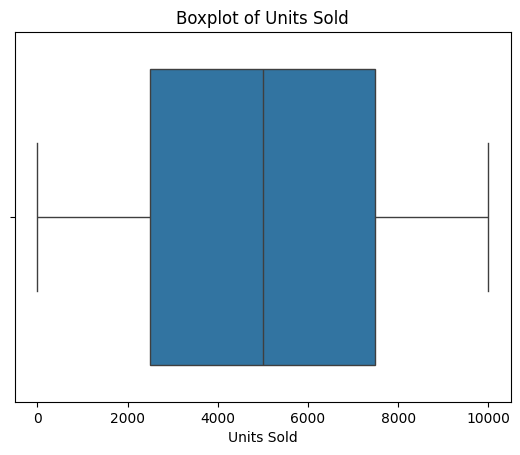

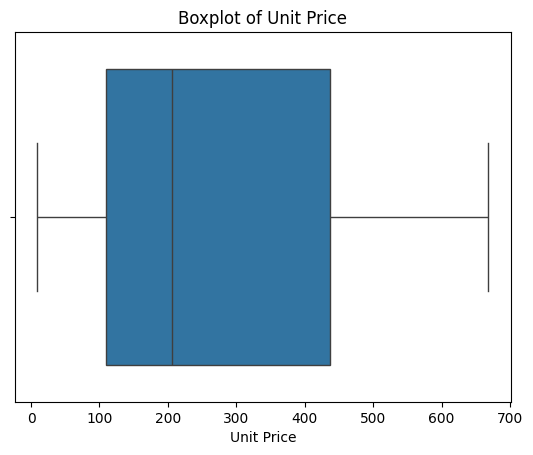

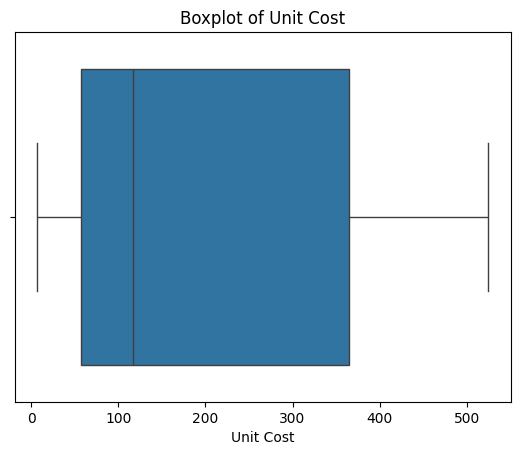

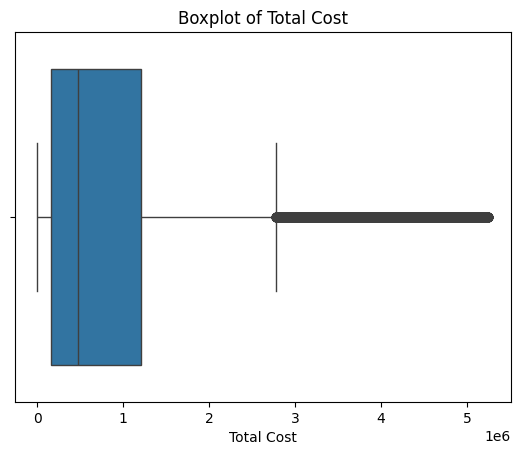

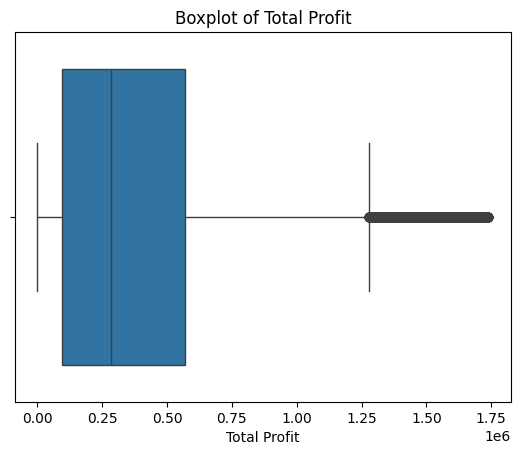

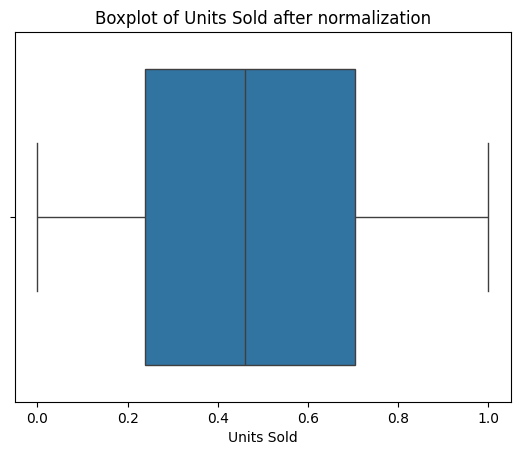

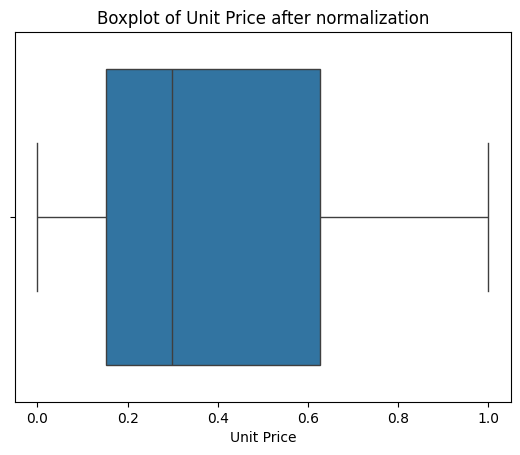

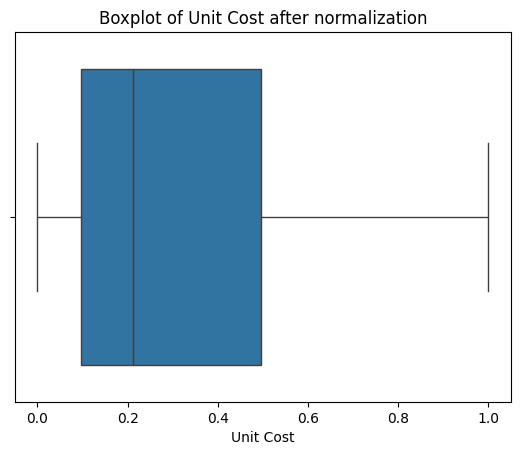

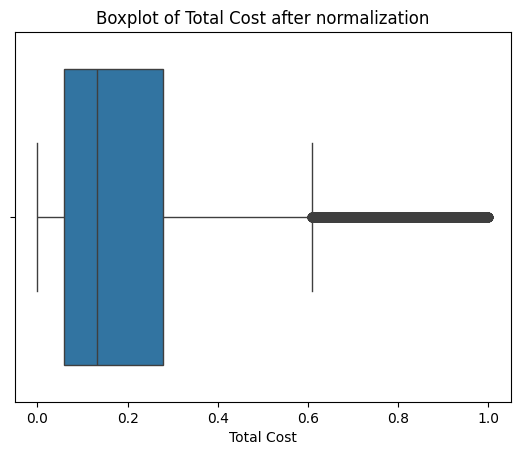

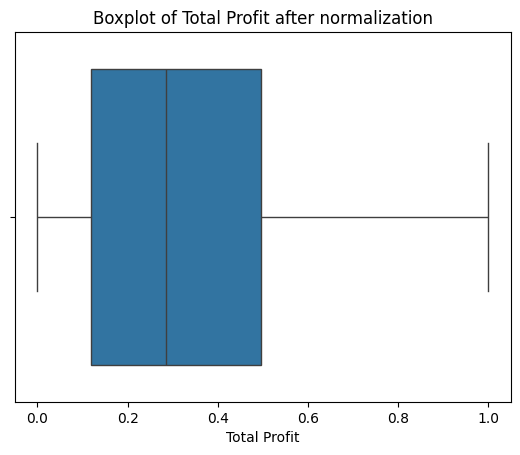

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the data
df = pd.read_excel('100000 Sales Records.xlsx')

# Select non-categorical columns
non_categorical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit']

# Step 1: Visualize the data using box plots to identify outliers
for column in non_categorical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Step 2: Remove outliers
# Let's define outliers as values that fall below the 5th percentile or above the 95th percentile
for column in non_categorical_columns:
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 3: Normalize the data
scaler = MinMaxScaler()
df[non_categorical_columns] = scaler.fit_transform(df[non_categorical_columns])

# Visualize the normalized data
for column in non_categorical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after normalization')
    plt.show()



In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_excel('100000 Sales Records.xlsx')

# Define the numerical encoded columns
numerical_encoded_columns = ['Units Sold', 'Unit Price', 'Unit Cost',
                             'Total Cost', 'Total Profit']

# Extract the numerical encoded features
X = df[numerical_encoded_columns]

# Set Total Revenue as the target variable
y = df['Total Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (80000, 5) (80000,)
Testing set shape: (20000, 5) (20000,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Chi-square analysis
# Perform chi-square test of independence between 'Item Type' and 'Sales Channel'
cross_tab = pd.crosstab(df['Item Type'], df['Sales Channel'])
chi2_stat, p_val = chi2(cross_tab.values, cross_tab.index)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)


# Regression analysis
# Perform linear regression between 'Total Profit' and 'Total Revenue'
X = df[['Total Revenue']]
y = df['Total Profit']
reg_model = LinearRegression()
reg_model.fit(X, y)
reg_coef = reg_model.coef_
reg_intercept = reg_model.intercept_
y_pred = reg_model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Coefficients:", reg_coef)
print("Intercept:", reg_intercept)
print("Mean Squared Error:", mse)


Chi-square statistic: [5.30004405 5.34806409]
p-value: [0.91576939 0.91314586]
Coefficients: [0.22701774]
Intercept: 90780.3832229785
Mean Squared Error: 32460366599.473347


In [1]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Encode the categorical variable 'Region' into numerical values
label_encoder = LabelEncoder()
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])

# Perform ANOVA for 'Total Revenue' with 'Region' as the independent variable
X = df[['Region_encoded']]
y = df['Total Revenue']
f_value, p_value = f_classif(X, y)
print("F-value:", f_value)
print("p-value:", p_value)



F-value: [0.93329831]
p-value: [1.]


In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Load the data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')

# Define categorical and non-categorical columns
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
non_categorical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit']  # Excluding 'Total Revenue'

# Encode categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Perform ANOVA for categorical columns
for column in categorical_columns:
    X = df[[column]]
    y = df['Total Revenue']  # Assuming 'Total Revenue' as the dependent variable
    f_value, p_value = f_classif(X, y)
    print(f"\nANOVA for {column}:")
    print("F-value:", f_value)
    print("p-value:", '{:.20f}'.format(p_value[0]))  # Print p-value with full decimals

# Perform ANOVA for non-categorical columns
for column in non_categorical_columns:
    X = df[[column]]
    y = df['Region']  # Assuming 'Region' as the categorical variable
    f_value, p_value = f_classif(X, y)
    print(f"\nANOVA for {column}:")
    print("F-value:", f_value)
    print("p-value:", '{:.20f}'.format(p_value[0]))  # Print p-value with full decimals



ANOVA for Region:
F-value: [0.93329831]
p-value: 0.99999999999972533082

ANOVA for Country:
F-value: [1.00877429]
p-value: 0.18215335433244639329

ANOVA for Item Type:
F-value: [3771.05308227]
p-value: 0.00000000000000000000

ANOVA for Sales Channel:
F-value: [0.92722783]
p-value: 0.99999999999999855671

ANOVA for Order Priority:
F-value: [0.92063104]
p-value: 0.99999999999999988898

ANOVA for Units Sold:
F-value: [1.16552573]
p-value: 0.32149043733369170317

ANOVA for Unit Price:
F-value: [0.78300673]
p-value: 0.58308499542373048996

ANOVA for Unit Cost:
F-value: [0.69358144]
p-value: 0.65483339506043902745

ANOVA for Total Cost:
F-value: [1.20668479]
p-value: 0.29922216764440817682

ANOVA for Total Profit:
F-value: [1.819623]
p-value: 0.09096433663211783704


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_excel('100000 Sales Records.xlsx')

# Select categorical variables
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

# Perform Chi-square test of independence for each pair of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        contingency_table = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-square test of independence between {categorical_columns[i]} and {categorical_columns[j]}:")
        print("Chi-square statistic:", chi2_stat)
        print("p-value:", p_val)
        print()


Chi-square test of independence between Region and Country:
Chi-square statistic: 600000.0
p-value: 0.0

Chi-square test of independence between Region and Item Type:
Chi-square statistic: 49.04318525423779
p-value: 0.9413305398579125

Chi-square test of independence between Region and Sales Channel:
Chi-square statistic: 8.381749413896099
p-value: 0.2114477944756466

Chi-square test of independence between Region and Order Priority:
Chi-square statistic: 25.365843601992342
p-value: 0.11516625846651728

Chi-square test of independence between Country and Item Type:
Chi-square statistic: 1884.214295510931
p-value: 0.987429952645794

Chi-square test of independence between Country and Sales Channel:
Chi-square statistic: 193.58395181794134
p-value: 0.2995165656443985

Chi-square test of independence between Country and Order Priority:
Chi-square statistic: 521.2647009464083
p-value: 0.8218951778655562

Chi-square test of independence between Item Type and Sales Channel:
Chi-square statis